<a href="https://colab.research.google.com/github/jhonix007/time-series/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("drive/MyDrive/Нетология/Data Science/Временные ряды/1/daily-total-female-births-in-cal.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

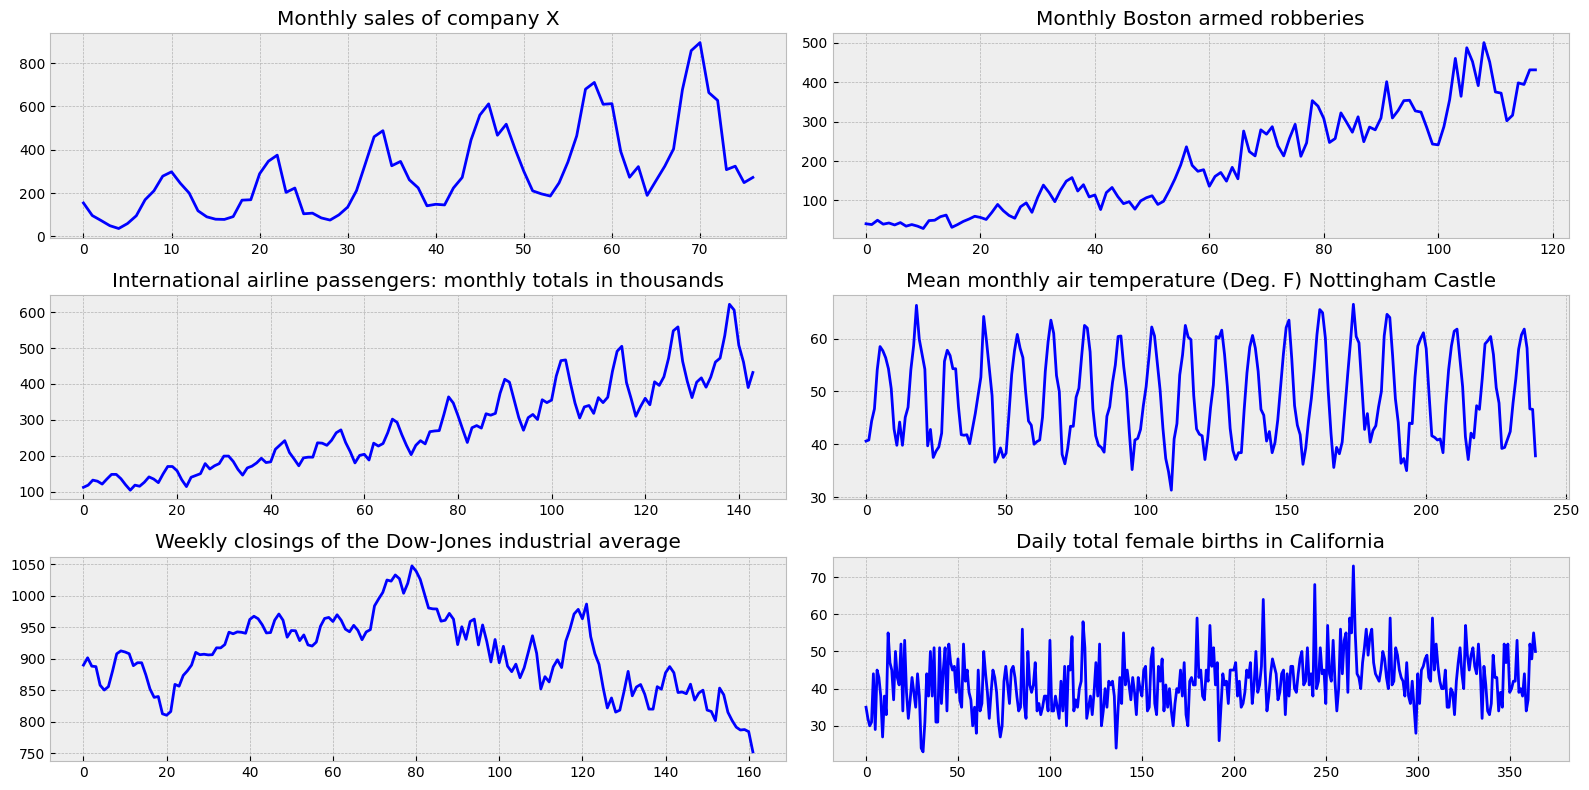

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

## Импортируем библиотеку pmdarima для построения модели ARIMA и поиска лучших коэффициентов

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

## Выберем ряд sales of company из первого задания

In [ ]:
# use pmdarima to automatically select best ARIMA model
series =  sales_of_company_x["Count"]
# set seasonal to True
seasonal = True
model = pm.auto_arima(series,
                      m=12,               # frequency of series
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=724.918, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=722.432, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=708.048, Time=1.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=716.875, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=767.880, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=707.729, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=707.779, Time=0.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=709.762, Time=1.69 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=704.814, Time=0.43 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=706.813, Time=0.81 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=706.812, Time=2.57 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=708.812, Time=1.69 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=699.267, Time=0.62 sec
 ARIMA(3,0,0)(1,1,0)[12] intercept   : AIC=700.769, Time=1.20 sec
 ARIMA(3,0,0)(0,1,1)[12] intercep

## Видим, что лучшие коэф-ты (0,1,0) при минимальном AIC

## Используем эти коэф-ты для обучения модели ARIMA и извлечения остатков разницы между исходным рядом и обученным

Results of Dickey-Fuller Test:
Test Statistic                 -4.681566
p-value                         0.000091
#Lags Used                     11.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


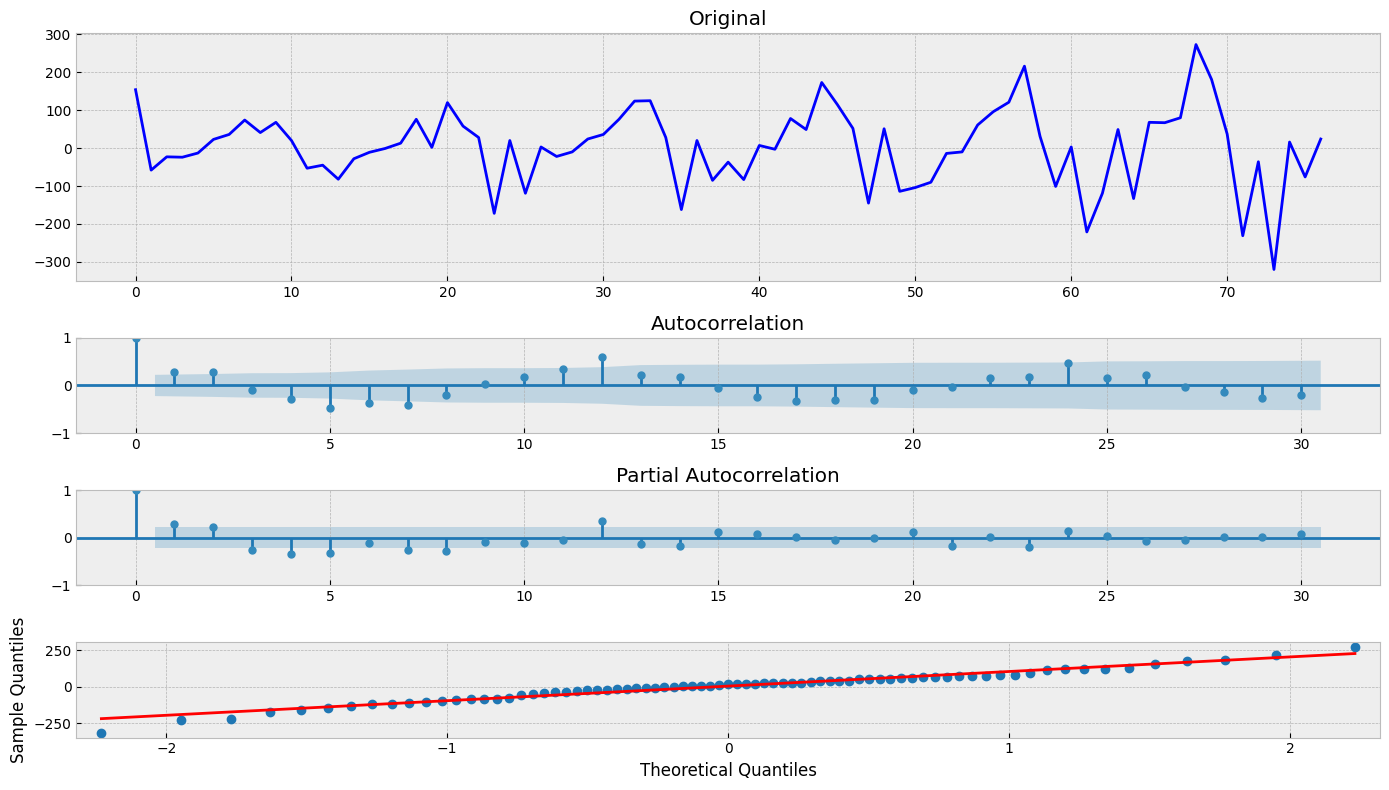

In [ ]:
best_mdl = smt.ARIMA(series, order=(0,1,0),trend='n').fit()

tsplot(best_mdl.resid, lags=30)

Видим, что ряд остатков стационарен.